In [1]:
# Paquetes necesarios
library(readr)
library(dplyr)
library(ggplot2)
library(gridExtra)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




## 2. Análisis exploratorio y visualización

In [2]:
# Cargamos los datos
spotifyStreamDf <- read_rds("../data/processed/spotifyStream.rds")

### 2.1 Análisis por artista

#### 2.1.1 Porcentaje de artistas únicos

Comenzamos calculando el porcentaje de artistas únicos escuchados, respecto al total de entradas en el dataframe.

In [3]:
uniqueArtist <- n_distinct(spotifyStreamDf$artistName) # Artistas únicos
totalArtist <- nrow(spotifyStreamDf) # Total de artistas
uniqueArtist / totalArtist * 100 # Porcentaje de artistas únicos

[1] 1.223218

Un gráfico circular nos permitirá un mejor entendimiento de este valor.

Para mas información sobre el gráfico circular, puede consultar el siguiente enlace: https://rdrr.io/r/graphics/pie.html

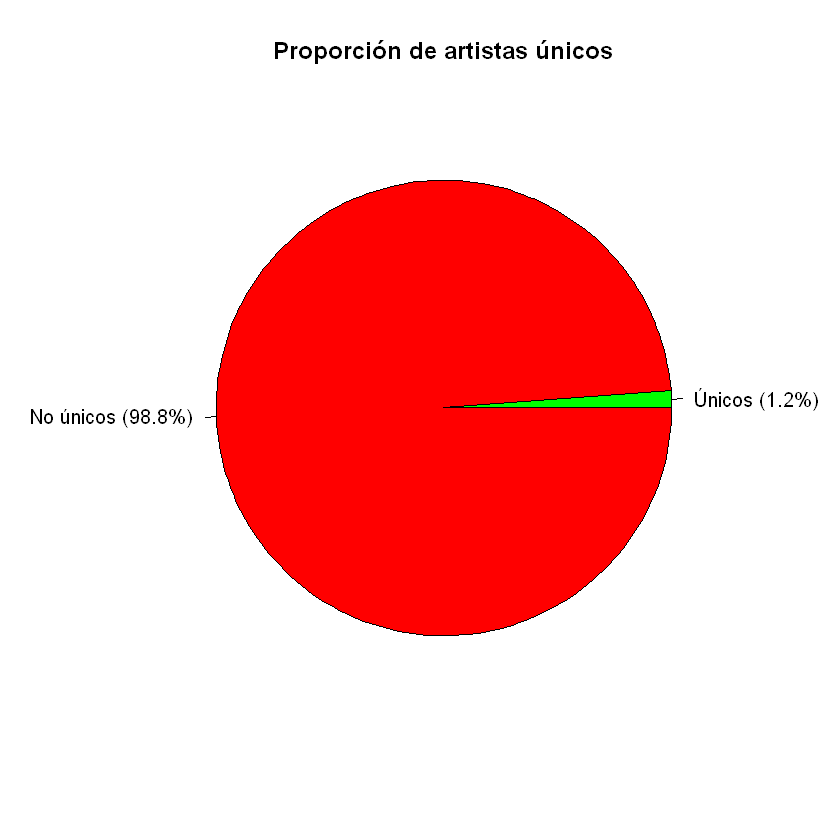

In [4]:
uniqueArtistVector <- c(uniqueArtist, totalArtist - uniqueArtist) # Vector con la cantidad de artistas únicos y no únicos
names(uniqueArtistVector) <- c("Únicos", "No únicos") # Nombres de los valores del vector

# Calcula los porcentajes
percentages <- (uniqueArtistVector / totalArtist) * 100

# Crear etiquetas con los porcentajes
labelsWithPercentage <- sprintf("%s (%.1f%%)", names(uniqueArtistVector), percentages)

pie(uniqueArtistVector,
    labels = labelsWithPercentage,
    main = "Proporción de artistas únicos",
    col = c("green", "red"))


Un porcentaje tan bajo de artistas únicos indica que hay muchos artistas que se repiten en el dataframe, es decir solo escucho un número reducido de artistas.

#### 2.1.2 Top artistas

In [5]:
topArtist <- spotifyStreamDf |>
  group_by(artistName) |> # Agrupamos por artista
  summarize(totalHours = sum(hoursPlayed), # Sumamos las horas escuchadas
            totalMinutes = sum(minutesPlayed), # Sumamos los minutos escuchados
            totalPlays = n()) # Contamos el número de reproducciones

topArtistByPlays <- topArtist |>
  arrange(desc(totalPlays)) # Ordenamos de mayor a menor por número de reproducciones

head(topArtistByPlays, 10) # Mostramos los 10 artistas más escuchados

artistName,totalHours,totalMinutes,totalPlays
<chr>,<dbl>,<dbl>,<int>
Porta,104.95714,6297.4282,2587
MisterWives,86.79649,5207.7896,2291
Tessa Violet,67.24083,4034.4498,1657
C-Kan,27.69563,1661.7380,670
Zara Larsson,19.59284,1175.5702,521
Santa RM,17.65792,1059.4754,418
Keyblade,23.28066,1396.8396,402
Santaflow,18.12421,1087.4527,393
K/DA,15.81898,949.1389,351


Puede encontrar mas información sobre las funciones de `dplyr`:
- `group_by()` [aquí](https://dplyr.tidyverse.org/reference/group_by.html)
- `summarise()` [aquí](https://dplyr.tidyverse.org/reference/summarise.html)
- `n()` [aquí](https://dplyr.tidyverse.org/reference/n.html)
- `arrange()` [aquí](https://dplyr.tidyverse.org/reference/arrange.html)

#### 2.1.3 Top 10 artistas más escuchados basado en el número de reproducciones

Utilizando el dataframe generado anteriormente y utilizando el paquete [`ggplot2`](https://ggplot2.tidyverse.org/) creamos un gráfico de barras que nos muestra la cantidad de reproducciones por artista.

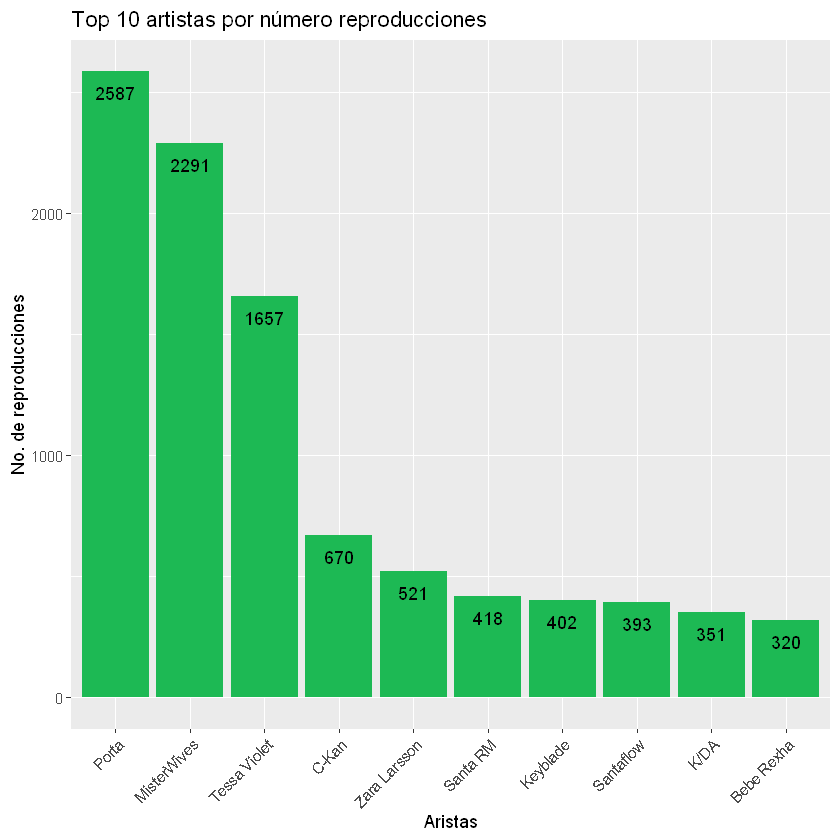

In [6]:
plotArtistByPlays <- topArtistByPlays |>
  head(10) |>
  ggplot(aes(x = reorder(artistName, -totalPlays), y = totalPlays)) +
  geom_col(fill = "#1DB954") +
  geom_text(aes(label = totalPlays), vjust = 2, colour = "black") +
  labs(x = "Aristas",
    y = "No. de reproducciones",
    title = "Top 10 artistas por número reproducciones") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

plotArtistByPlays

El paquete `ggplot2` nos permite realizar gráficos siguiendo una estructura de capas.

En este caso, utilizamos como aes (aesthetic) los nombres de los artistas( utilizamos la función [`reorder()`](https://search.r-project.org/R/refmans/stats/html/reorder.factor.html) para ordenar los nombres de los artistas según la cantidad de reproducciones) y la cantidad de reproducciones.

Las capas [`geom_col()`](https://ggplot2.tidyverse.org/reference/geom_bar.html) para las barras , [`geom_text()`](https://ggplot2.tidyverse.org/reference/geom_text.html) para agregar el texto con la cantidad de reproducciones y [`labs()`](https://ggplot2.tidyverse.org/reference/labs.html) para agregar el título y los nombres de los ejes. Por ultimo ajustamos el tema con [`theme()`](https://ggplot2.tidyverse.org/reference/theme.html).

#### 2.1.4 Top 10 artistas más escuchados basado en las horas de escucha

In [7]:
topArtistByTime <- topArtist |>
  arrange(desc(totalHours))

head(topArtistByTime, 10)

artistName,totalHours,totalMinutes,totalPlays
<chr>,<dbl>,<dbl>,<int>
Porta,104.95714,6297.4282,2587
MisterWives,86.79649,5207.7896,2291
Tessa Violet,67.24083,4034.4498,1657
C-Kan,27.69563,1661.7380,670
Keyblade,23.28066,1396.8396,402
Zara Larsson,19.59284,1175.5702,521
Santaflow,18.12421,1087.4527,393
Santa RM,17.65792,1059.4754,418
K/DA,15.81898,949.1389,351


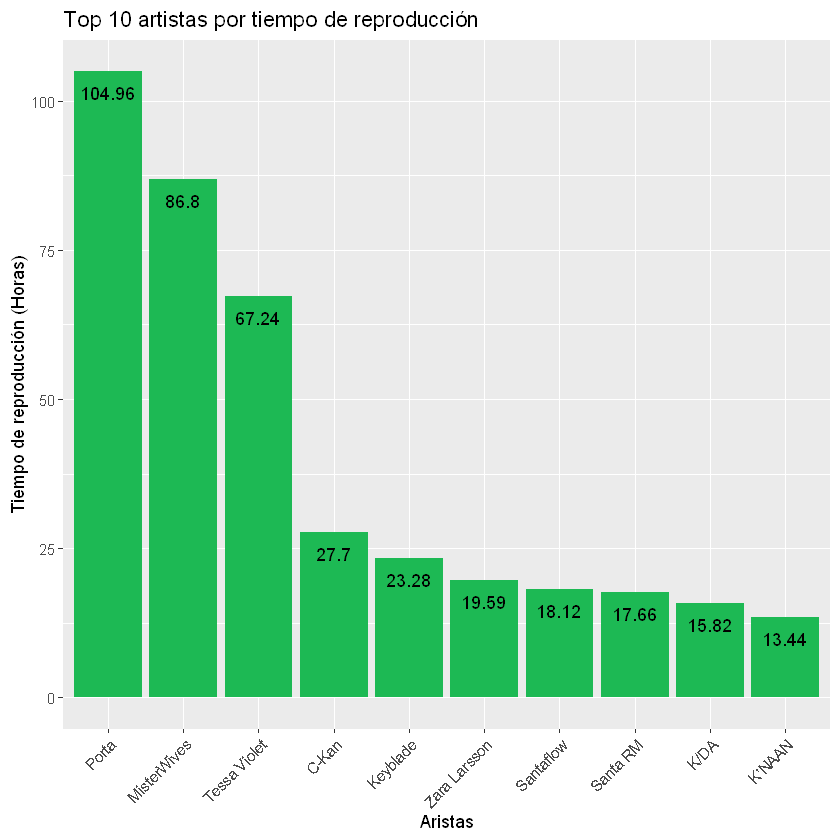

In [8]:
plotArtistByTime <- topArtistByTime |>
  head(10) |>
  ggplot(aes(x = reorder(artistName, -totalHours), y = totalHours)) +
  geom_col(fill = "#1DB954") +
  geom_text(aes(label = round(totalHours, 2)), vjust = 2, colour = "black") +
  labs(x = "Aristas",
    y = "Tiempo de reproducción (Horas)",
    title = "Top 10 artistas por tiempo de reproducción") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

plotArtistByTime

#### 2.1.5 Top 10 por reproducciones vs. top 10 por tiempo

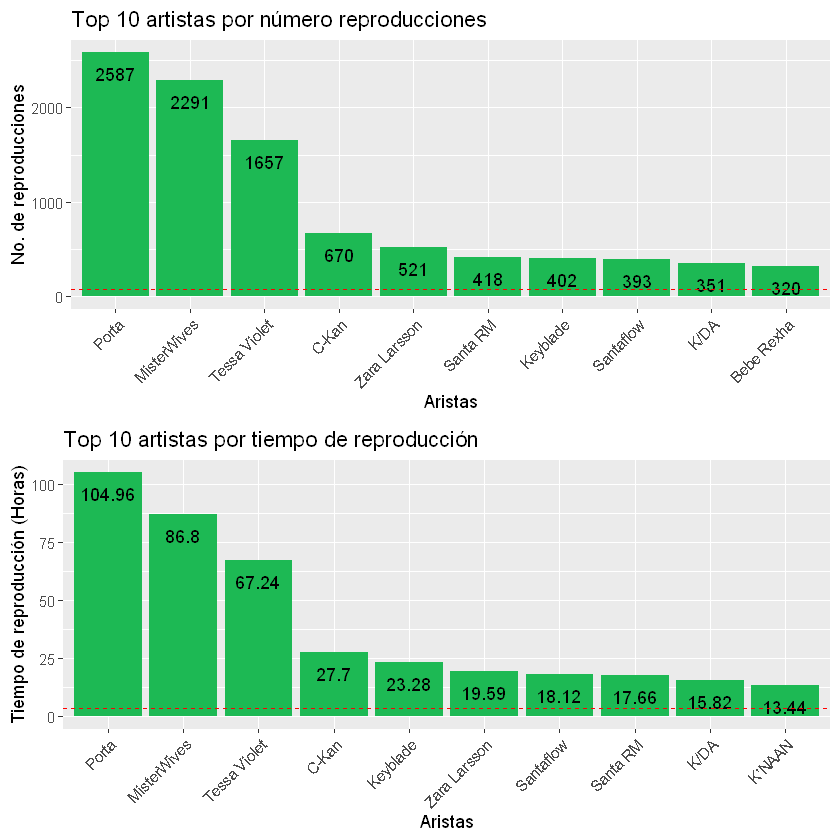

In [9]:
grid.arrange(
  plotArtistByPlays +
  geom_hline(
    yintercept = mean(topArtistByPlays$totalPlays),
    color = "red",
    linetype = "dashed"),
  plotArtistByTime +
  geom_hline(
    yintercept = mean(topArtistByTime$totalHours),
    color = "red",
    linetype = "dashed")
)

La función [`grid.arrange()`](https://www.rdocumentation.org/packages/gridExtra/versions/2.3/topics/grid.arrange) permite combinar gráficos de ggplot2 en una sola figura. Para ello, se deben pasar los gráficos como argumentos de la función.

Agregamos también una linea horizontal que representa el promedio de la variable de interés en cada gráfico. Lo cual nos permite ver que en ambos casos, el valor de la variable de interés es muy superior al promedio.

Además, podemos ver que el top 4 de artistas se mantienen en ambos gráficos en el mismo orden.

### 2.2 Análisis por canción

#### 2.2.1 Porcentaje de canciones únicas

In [10]:
uniqueSongs <- n_distinct(spotifyStreamDf$trackName)
totalSongs <- nrow(spotifyStreamDf)
uniqueSongs / totalSongs * 100

[1] 3.731983

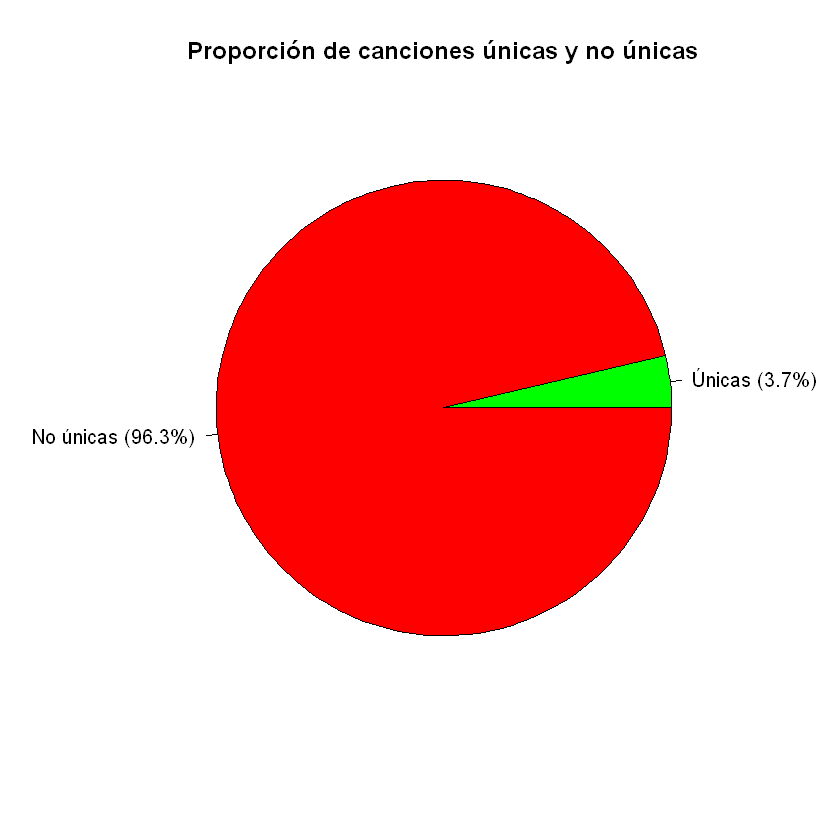

In [11]:
uniqueSongVector <- c(uniqueSongs, totalSongs - uniqueSongs)
names(uniqueSongVector) <- c("Únicas", "No únicas")
percentages <- uniqueSongVector / totalSongs * 100
labelsWithPercentage <- sprintf("%s (%.1f%%)", names(uniqueSongVector), percentages)
pie(uniqueSongVector,
  labels = labelsWithPercentage,
  main = "Proporción de canciones únicas y no únicas",
  col = c("green", "red"))

El porcentaje tan bajo de canciones únicas indica que hay muchas canciones que se repiten.

#### 2.2.2 Top canciones

In [12]:
topSongs <- spotifyStreamDf |>
  group_by(trackName) |> # Agrupamos por nombre de canción
  summarize(artistName = first(artistName), # Obtenemos el nombre del artista
            totalHours = sum(hoursPlayed), # Sumamos las horas escuchadas
            totalMinutes = sum(minutesPlayed), # Sumamos los minutos escuchados
            totalPlays = n()) # Contamos el número de reproducciones

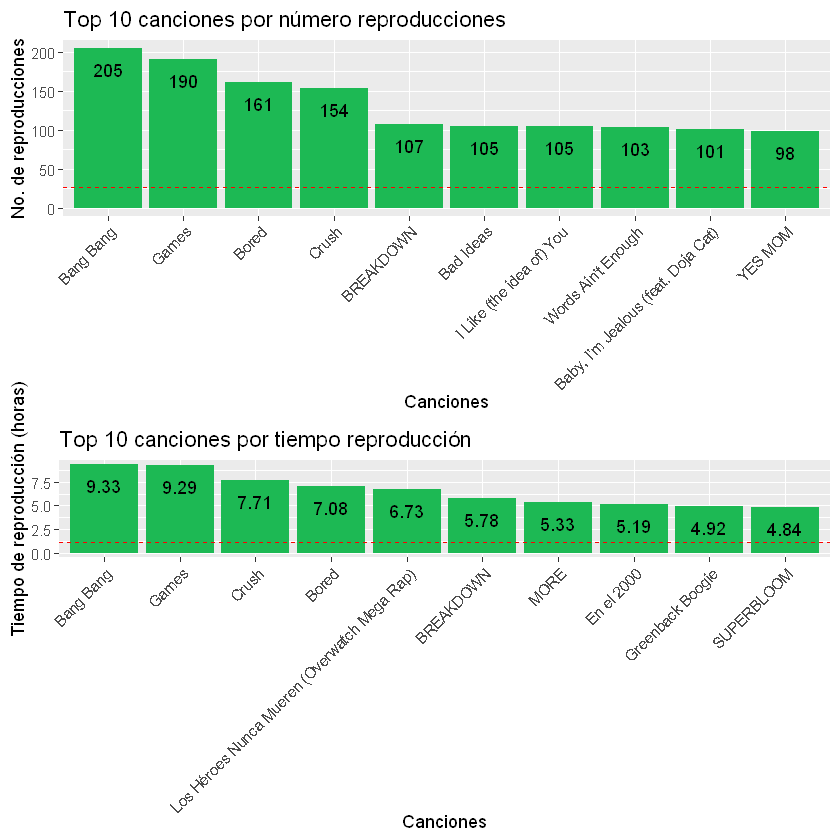

In [13]:
plotSongsByPlays <- topSongs |>
  arrange(desc(totalPlays)) |>
  head(10) |>
  ggplot(aes(x = reorder(trackName, -totalPlays), y = totalPlays)) +
  geom_col(fill = "#1DB954") +
  geom_text(aes(label = totalPlays), vjust = 2, colour = "black") +
  geom_hline(yintercept = mean(topSongs$totalPlays), linetype = "dashed", color = "red") +
  labs(
    x = "Canciones",
    y = "No. de reproducciones",
    title = "Top 10 canciones por número reproducciones"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

plotSongsByTime <- topSongs |>
  arrange(desc(totalHours)) |>
  head(10) |>
  ggplot(aes(x = reorder(trackName, -totalHours), y = totalHours)) +
  geom_col(fill = "#1DB954") +
  geom_text(aes(label = round(totalHours, 2)), vjust = 2, colour = "black") +
  geom_hline(yintercept = mean(topSongs$totalHours), linetype = "dashed", color = "red") +
  labs(
    x = "Canciones",
    y = "Tiempo de reproducción (horas)",
    title = "Top 10 canciones por tiempo reproducción"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

grid.arrange(plotSongsByPlays, plotSongsByTime)


En el caso de las canciones solo el top 2 se mantiene en la misma posición en ambos gráficos.

### 2.3 Análisis por día de la semana

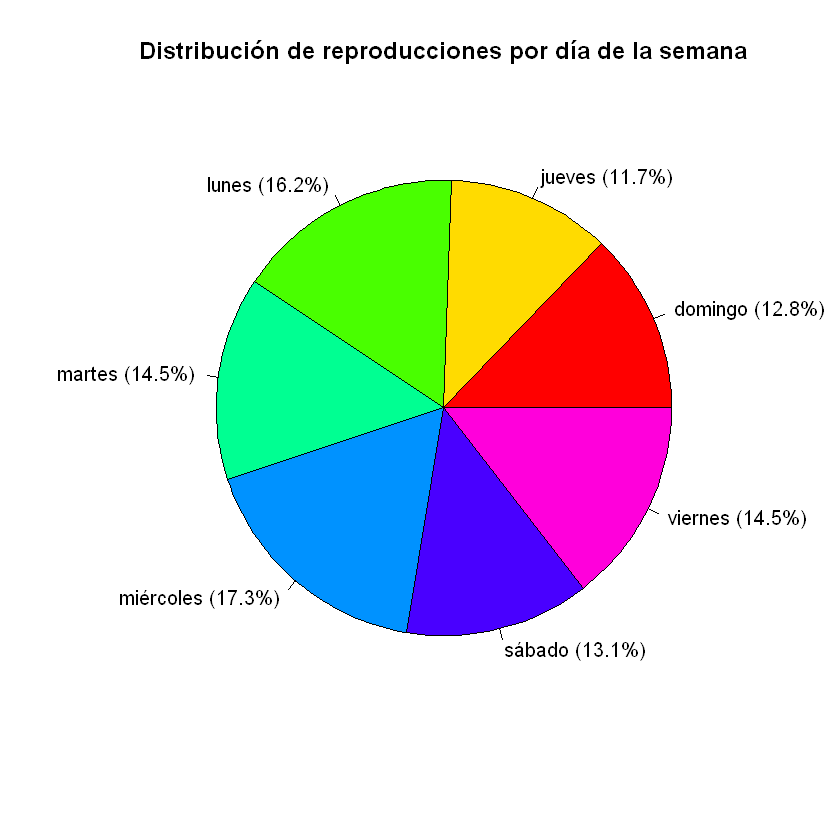

In [14]:
countByWeekdayName <- spotifyStreamDf %>%
  group_by(weekdayName) %>%
  summarise(count = n())

# Calcular porcentajes
total_count <- sum(countByWeekdayName$count)
countByWeekdayName$percentage <- (countByWeekdayName$count / total_count) * 100

# Crear etiquetas con porcentajes formateados
labelsWithPercentage <- sprintf("%s (%.1f%%)", countByWeekdayName$weekdayName, countByWeekdayName$percentage)

pie(countByWeekdayName$count,
    labels = labelsWithPercentage,
    main = "Distribución de reproducciones por día de la semana",
    col = rainbow(length(countByWeekdayName$count)))


El gráfico anterior muestra que generalmente utilizo Spotify más los miércoles.

### 2.4 Análisis por día

Uso promedio durante un día

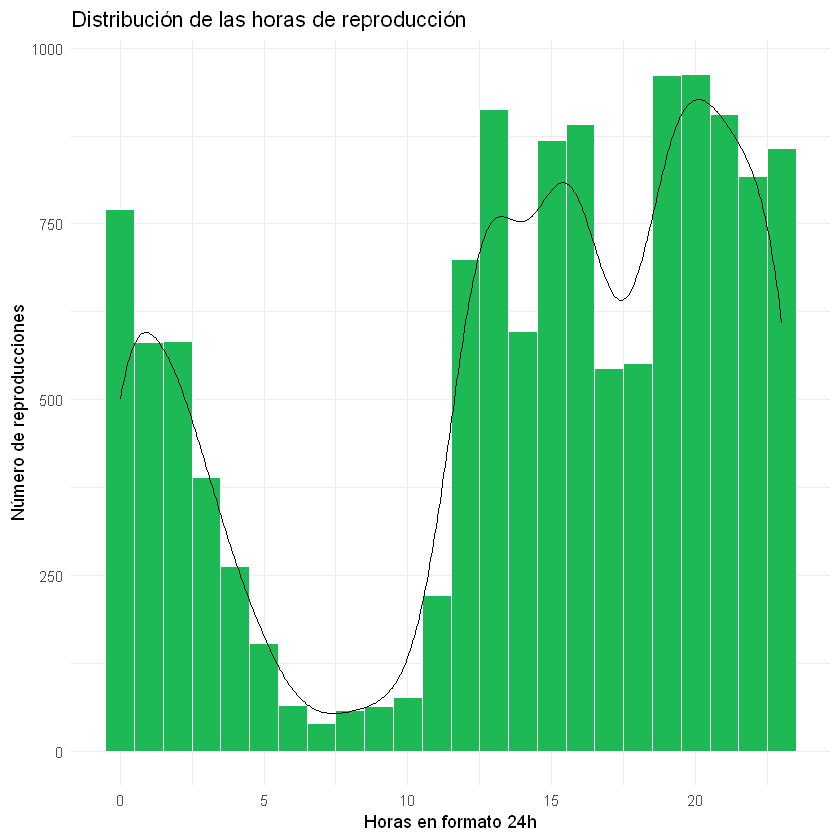

In [15]:
spotifyStreamDf |>
  ggplot(aes(hour)) +
  geom_histogram(bins = 24, fill = "#1DB954", color = "white") +
  geom_density(aes(y = after_stat(count))) +
  labs(title = "Distribución de las horas de reproducción",
       x = "Horas en formato 24h",
       y = "Número de reproducciones") +
  theme_minimal()

El histograma permite ver que:

- El máximo se encuentra alrededor de la marca de las 7 PM y las 8 PM.
- El mínimo se encuentra alrededor de las 7 AM.

Para este gráfico utilizamos las capas [`geom_histogram()`](https://ggplot2.tidyverse.org/reference/geom_histogram.html) y [`geom_density()`](https://ggplot2.tidyverse.org/reference/geom_density.html).

### 2.5 Análisis por año

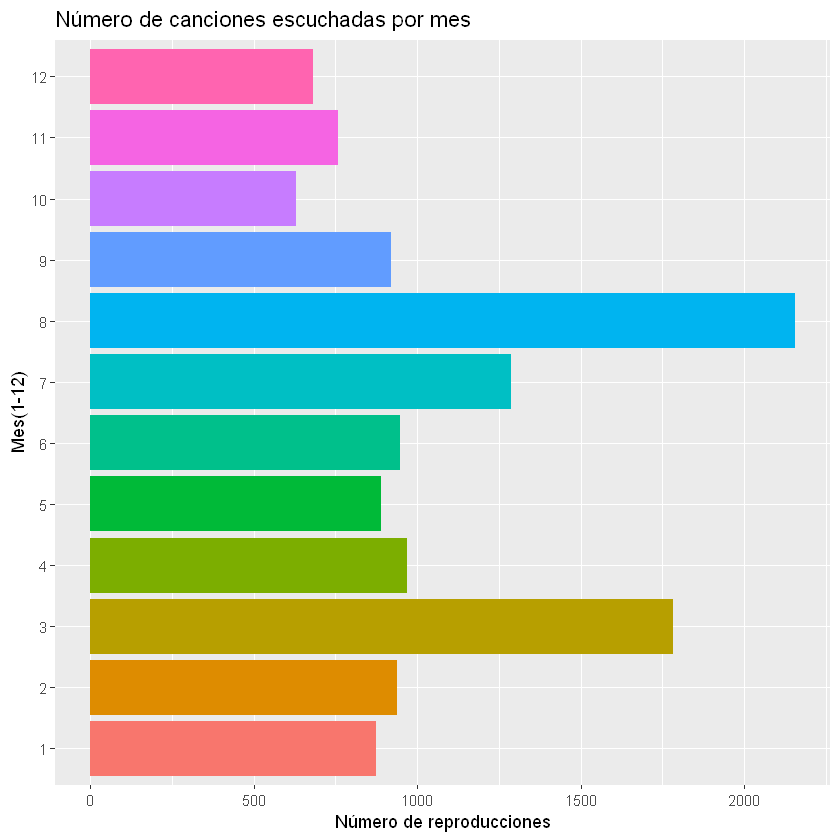

In [16]:
spotifyStreamDf |>
  ggplot(aes(y = factor(month), fill = factor(month))) +
  geom_bar() +
  labs(title = "Número de canciones escuchadas por mes", x = "Número de reproducciones", y = "Mes(1-12)") +
  theme(legend.position = "none")

Podemos observar que el número de reproducciones por mes es muy similar destacando muy por encima unicamente el mes 3 (marzo) y el mes 8 (agosto) y por debajo el mes 10 (octubre).